In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools as it
import math
%matplotlib inline

In [70]:
# read the sales file and show first few rows
sale = pd.read_csv("Sales_1990to2015.csv")
sale.head()

,Year,State,Sale
0,1990,AK,94.8
1,1990,AL,55.7
2,1990,AR,67.0
3,1990,AZ,77.5
4,1990,CA,88.4


In [71]:
# creat a list includes all states abbreviation
state_list = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 
         'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 
         'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 
         'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
         'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']

/Users/IvanC/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/IvanC/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/IvanC/miniconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


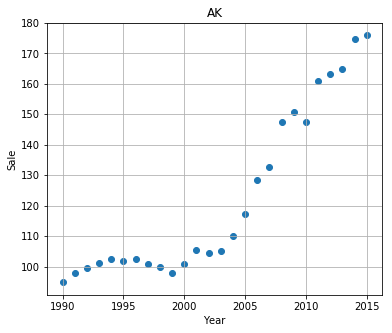

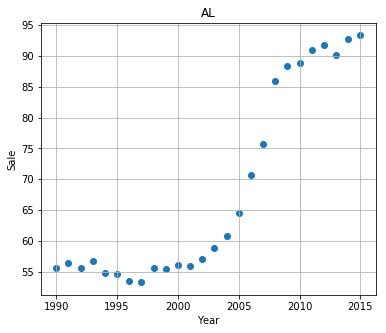

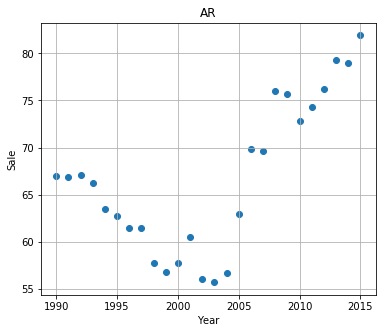

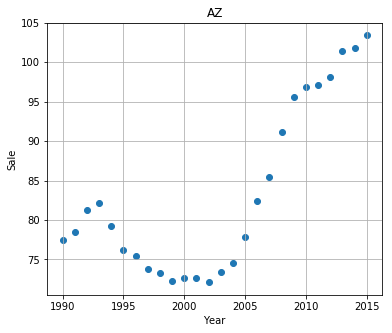

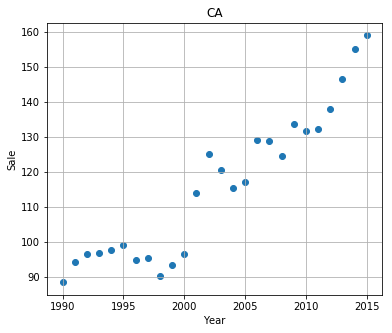

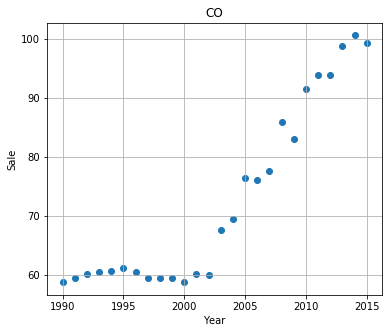

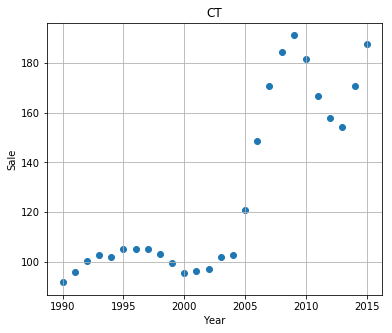

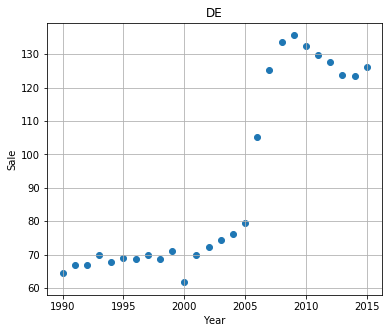

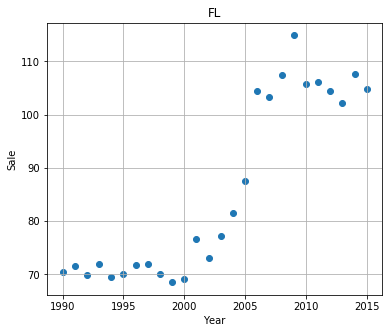

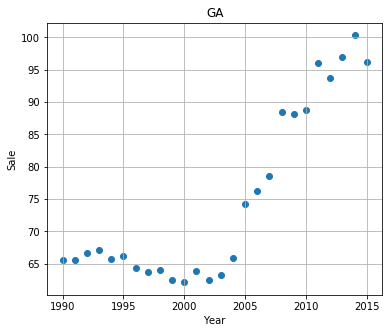

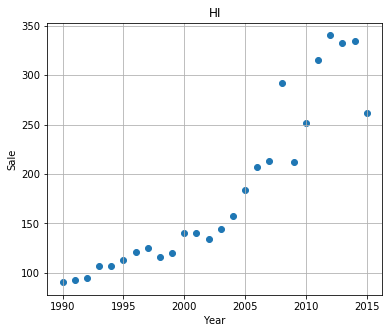

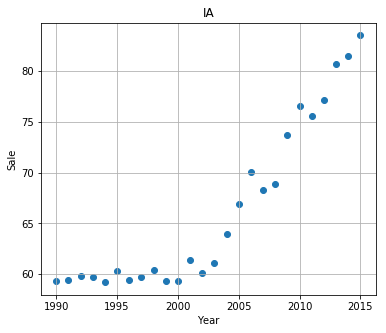

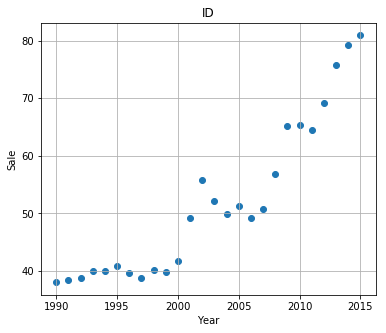

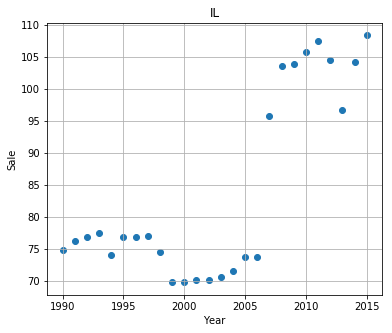

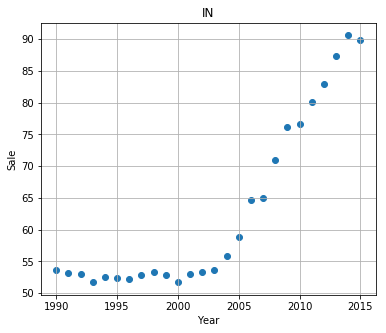

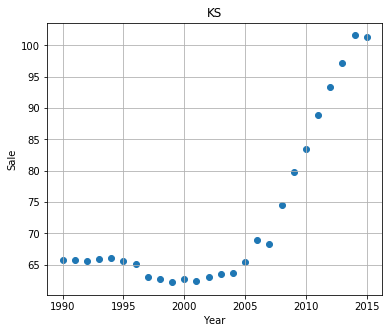

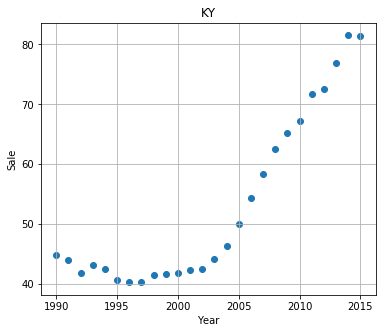

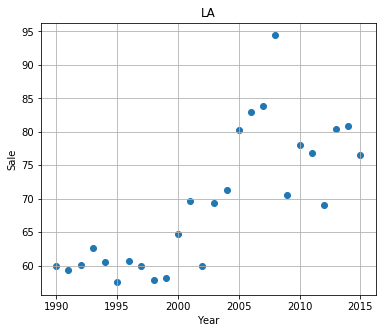

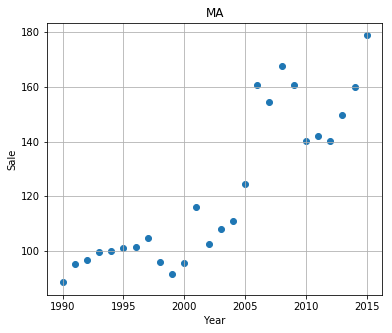

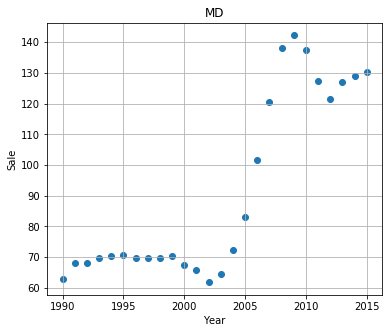

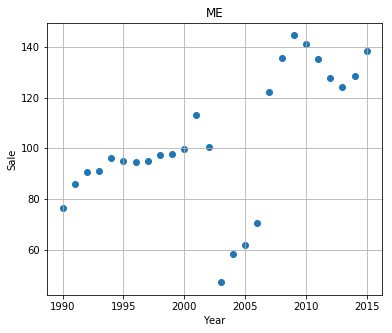

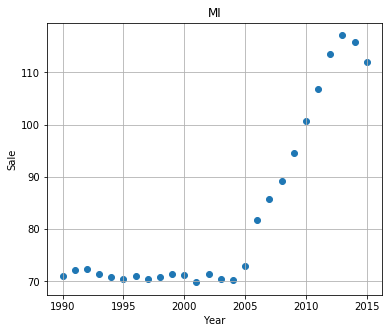

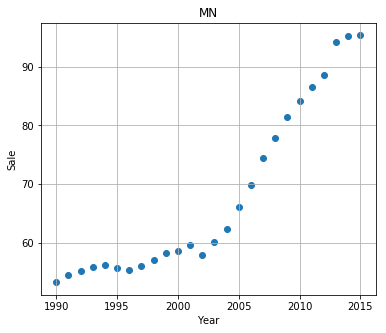

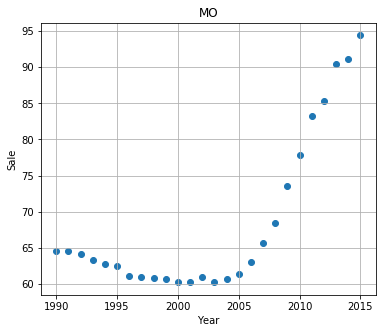

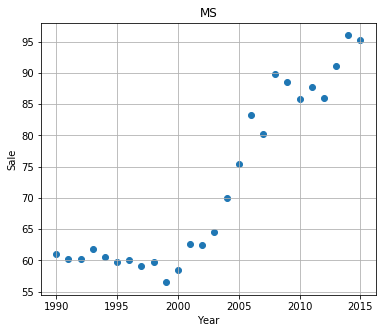

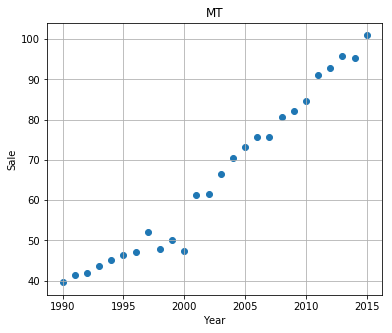

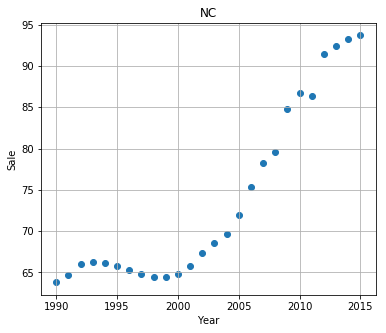

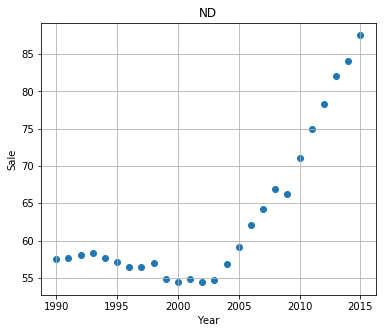

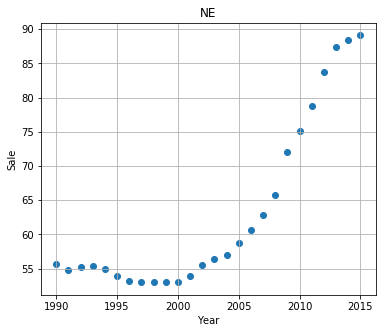

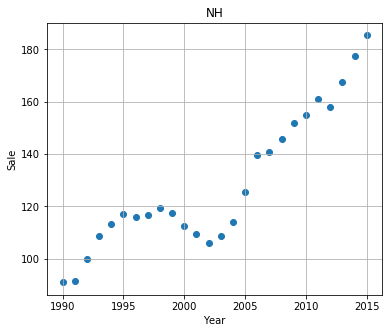

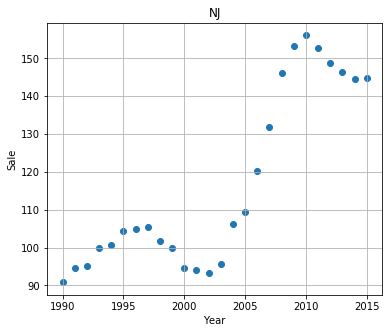

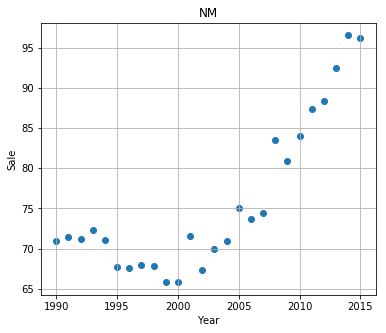

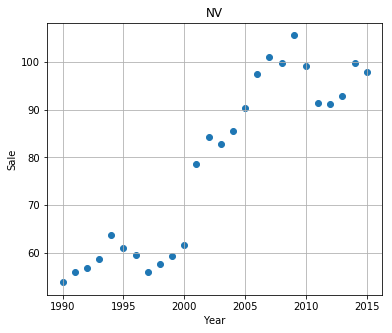

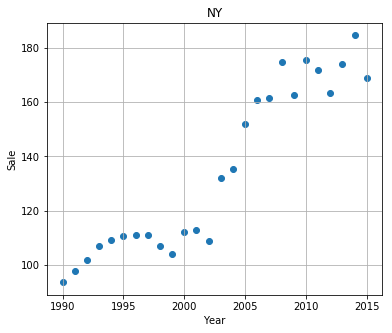

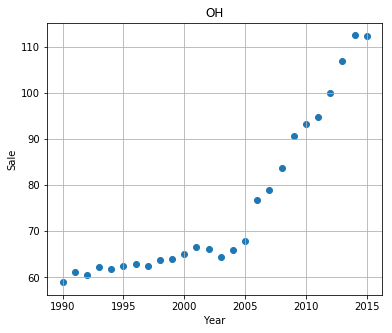

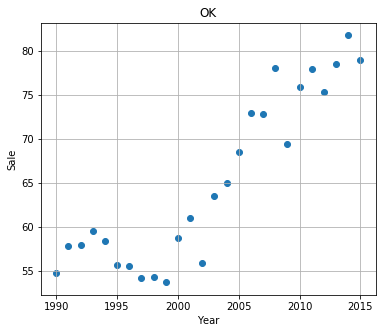

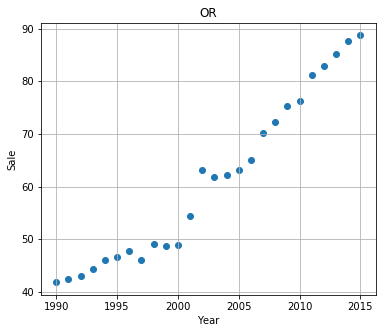

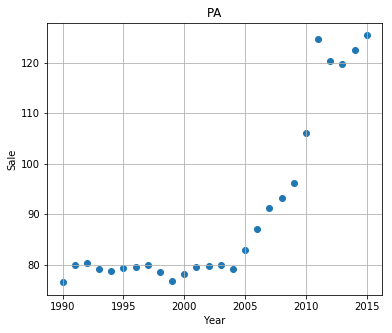

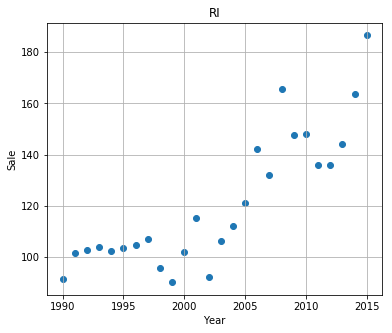

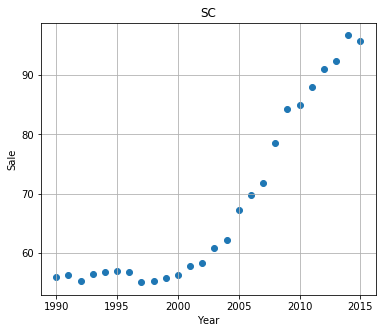

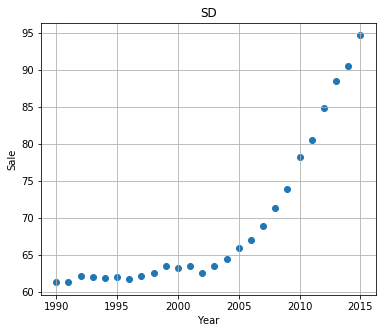

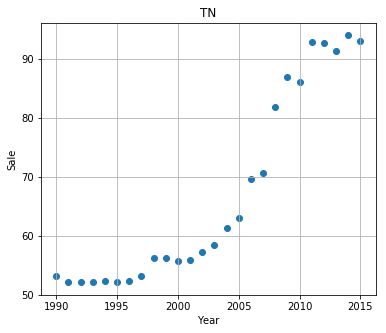

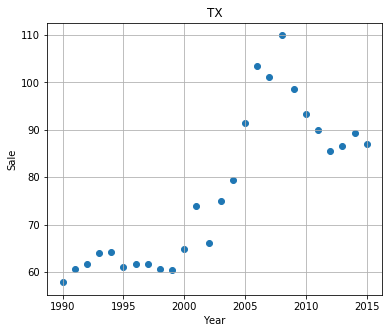

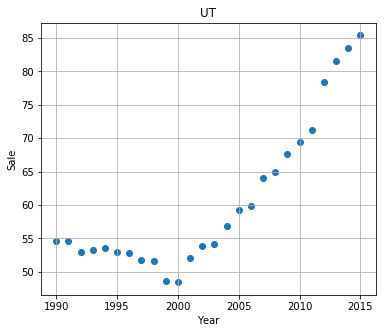

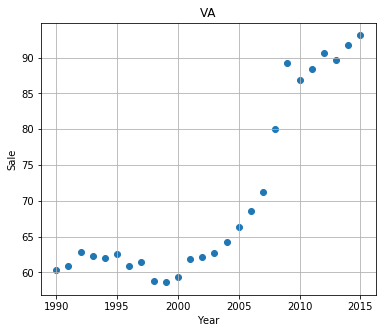

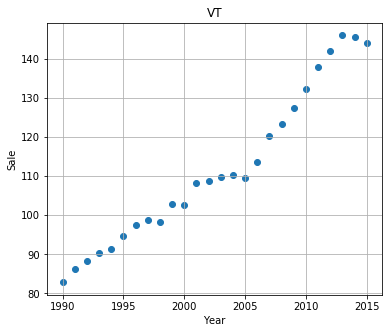

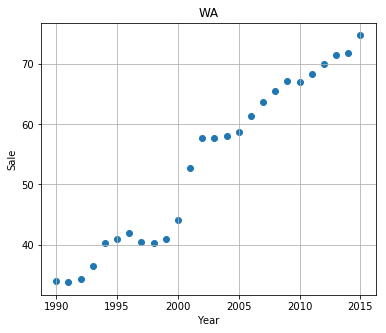

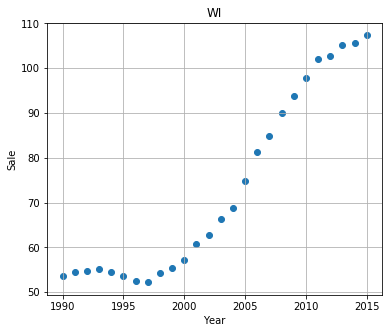

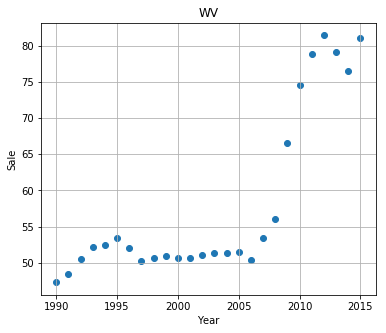

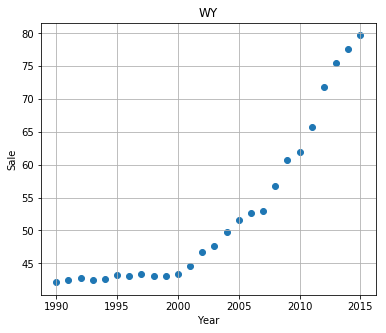

In [72]:
# make the scatter plot of sale vs year for each state
for i in state_list:
    plt.figure(figsize = (6,5))
    plt.subplot(111)
    plt.scatter(list(sale[ sale.State == i ][ pd.isnull(sale.Sale) == False].Year),
                list(sale[ sale.State == i ][ pd.isnull(sale.Sale) == False].Sale))
    # set up the x,y labels, and plot title as state name
    plt.ylabel('Sale')
    plt.xlabel('Year')
    plt.title(i)
    plt.grid()

In [10]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
%matplotlib inline

sale_AK = sale[sale['State'].isin(['AK'])].reset_index(drop = True)

,Year,State,Sale
0,1990,AK,94.8
1,1991,AK,98.0
2,1992,AK,99.5
3,1993,AK,101.2
4,1994,AK,102.5
5,1995,AK,101.7
6,1996,AK,102.4
7,1997,AK,100.7
8,1998,AK,99.7
9,1999,AK,97.8


In [73]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(sale_AK.Year.reshape(-1,1), sale_AK.Sale).predict(sale_AK.Year.reshape(-1,1))
y_lin = svr_lin.fit(sale_AK.Year.reshape(-1,1), sale_AK.Sale).predict(sale_AK.Year.reshape(-1,1))
y_poly = svr_poly.fit(sale_AK.Year.reshape(-1,1), sale_AK.Sale).predict(sale_AK.Year.reshape(-1,1))

/Users/IvanC/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/IvanC/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/IvanC/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


/Users/IvanC/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
/Users/IvanC/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  app.launch_new_instance()
/Users/IvanC/miniconda3/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/IvanC/miniconda3/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
/Users/IvanC/miniconda3/lib/

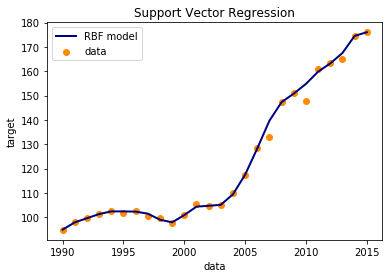

In [74]:
lw = 2
plt.scatter(sale_AK.Year.reshape(-1,1), sale_AK.Sale, color='darkorange', label='data')
plt.hold('on')
plt.plot(sale_AK.Year.reshape(-1,1), y_rbf, color='navy', lw=lw, label='RBF model')
#plt.plot(sale_AK.Year.reshape(-1,1), y_lin, color='c', lw=lw, label='Linear model')
#plt.plot(sale_AK.Year.reshape(-1,1), y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [79]:
function = svr_rbf.decision_function
param = svr_rbf.get_params()
param

{'C': 1000.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 0.1,
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [65]:
X = np.sort(np.arange(2016,2050), axis=0)

predict_list = []
for number in X:
    predicty = svr_rbf.predict(number)
    predict_list.append(predicty)

predict_list

[array([ 163.65463635]),
 array([ 142.64501922]),
 array([ 125.50095013]),
 array([ 118.12082469]),
 array([ 117.63337813]),
 array([ 119.19761715]),
 array([ 120.38981966]),
 array([ 120.90475312]),
 array([ 121.0610262]),
 array([ 121.09664433]),
 array([ 121.10293105]),
 array([ 121.10380512]),
 array([ 121.10390186]),
 array([ 121.10391045]),
 array([ 121.10391106]),
 array([ 121.1039111]),
 array([ 121.1039111]),
 array([ 121.1039111]),
 array([ 121.1039111]),
 array([ 121.1039111]),
 array([ 121.1039111]),
 array([ 121.1039111]),
 array([ 121.1039111]),
 array([ 121.1039111]),
 array([ 121.1039111]),
 array([ 121.1039111]),
 array([ 121.1039111]),
 array([ 121.1039111]),
 array([ 121.1039111]),
 array([ 121.1039111]),
 array([ 121.1039111]),
 array([ 121.1039111]),
 array([ 121.1039111]),
 array([ 121.1039111])]

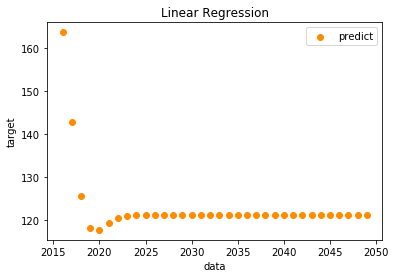

<bound method RegressorMixin.score of SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)>


In [77]:
lw = 2
plt.scatter(X, predict_list, color='darkorange', label='predict')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Linear Regression')
plt.legend()
plt.show()

print(svr_rbf.score)